In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import h5py
from scipy.stats import kde

In [2]:
inputMC = 'data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'
f = h5py.File(inputMC, 'r')
list(f.keys())

['LHCbMCTruth_Lb', 'LHCbMC_Lb']

In [3]:
LHCbMC_Lb = pd.read_hdf(inputMC, key='LHCbMC_Lb')
LHCbMC_Lb

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.952388,-0.165336,26.651770,402.777832,-229.470520,5536.814453,0.9524,-0.1653,26.652201,1910.136719,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.845292,-0.195122,3.622388,139.395874,322.585419,7428.522461,0.8453,-0.1950,3.620400,481.652618,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.480003,-0.762014,18.670696,-819.340149,-626.124390,5389.564453,-0.4801,-0.7620,18.671101,-5395.257812,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.681797,-2.255294,-36.569271,113.645294,-329.222229,4678.392090,1.6818,-2.2553,-36.569199,7835.708984,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
4,0.824895,-0.252737,74.871048,-100.702072,60.565861,6466.218750,0.8242,-0.2542,74.883598,-74.406654,...,135.662018,8106.856445,-3448.149902,-1045.294434,90591.554688,588.637329,239.301941,10912.332031,T,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.964920,0.161698,-12.157676,293.129822,39.016293,7097.797363,0.9649,0.1621,-12.151800,3175.616943,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.498788,1.215896,21.856564,-176.847626,145.914993,8691.596680,-0.5001,1.2166,21.869101,-2664.720215,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.114458,-0.046962,25.276293,-29.465662,-15.364128,949.110657,0.1145,-0.0469,25.275400,-6107.898926,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [4]:
list(LHCbMC_Lb)

['Lb_ENDVERTEX_X',
 'Lb_ENDVERTEX_Y',
 'Lb_ENDVERTEX_Z',
 'L_ENDVERTEX_X',
 'L_ENDVERTEX_Y',
 'L_ENDVERTEX_Z',
 'Jpsi_ENDVERTEX_X',
 'Jpsi_ENDVERTEX_Y',
 'Jpsi_ENDVERTEX_Z',
 'L_PX',
 'L_PY',
 'L_PZ',
 'Lb_PX',
 'Lb_PY',
 'Lb_PZ',
 'Jpsi_PX',
 'Jpsi_PY',
 'Jpsi_PZ',
 'p_PX',
 'p_PY',
 'p_PZ',
 'pim_PX',
 'pim_PY',
 'pim_PZ',
 'mum_PX',
 'mum_PY',
 'mum_PZ',
 'mup_PX',
 'mup_PY',
 'mup_PZ',
 'L_M',
 'L_MM',
 'Lb_M',
 'Lb_MM',
 'Jpsi_M',
 'Jpsi_MM',
 'Lb_BPVDIRA',
 'Lb_BPVIPCHI2',
 'Lb_BPVVDCHI2',
 'Lb_VFASPF_CHI2_VDOF',
 'L_BPVDIRA',
 'L_BPVIPCHI2',
 'L_BPVVDCHI2',
 'L_VFASPF_CHI2_VDOF',
 'Lb_OWNPV_X',
 'Lb_OWNPV_Y',
 'Lb_OWNPV_Z',
 'Lb_OWNPV_CHI2',
 'Lb_OWNPV_NDOF',
 'L_ID',
 'Lb_ID',
 'Jpsi_ID',
 'p_ID',
 'pim_ID',
 'mum_ID',
 'mup_ID',
 'DTF_FixJPsi_status',
 'DTF_FixJPsi_Lb_M',
 'DTF_FixJPsi_Lb_P',
 'DTF_FixJPsi_chi2',
 'DTF_FixJPsi_nDOF',
 'DTF_FixJPsi_PV_key',
 'DTF_FixJPsi_PV_X',
 'DTF_FixJPsi_PV_Y',
 'DTF_FixJPsi_PV_Z',
 'DTF_FixJPsi_L_M',
 'DTF_FixJPsi_L_P',
 'DTF_FixJPsi_L_dec

In [5]:
LHCbMC_Lb_Filtered = LHCbMC_Lb.loc[(LHCbMC_Lb['L_ENDVERTEX_Z'] >= 5500) & (LHCbMC_Lb['L_ENDVERTEX_Z'] <= 8500)]

In [6]:
#LHCbMCTruth_Lb = pd.read_hdf(inputMC, key='LHCbMCTruth_Lb')
#LHCbMCTruth_Lb

In [7]:
#list(LHCbMCTruth_Lb)

# Data analysis
## $\Lambda$ decay vertex: $x$ component

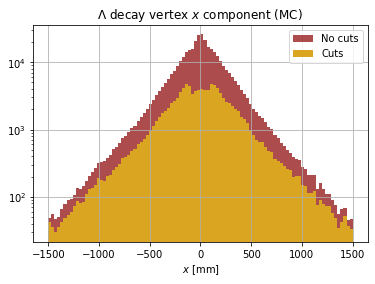

In [8]:
plt.hist(LHCbMC_Lb['L_ENDVERTEX_X'], bins=100, range=(-1500,1500),
         color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(LHCbMC_Lb_Filtered['L_ENDVERTEX_X'], bins=100, range=(-1500,1500),
         color='goldenrod', alpha=1, label="Cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $x$ component (MC)")
plt.legend()
plt.xlabel("$x$ [mm]")
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC.pdf")
plt.show()

## $\Lambda$ decay vertex: $y$ component

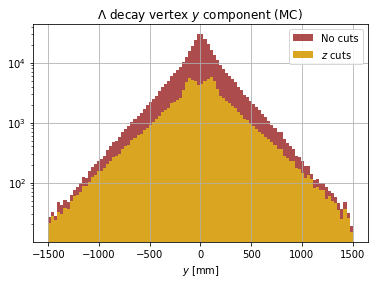

In [9]:
plt.hist(LHCbMC_Lb['L_ENDVERTEX_Y'], bins=100, range=(-1500,1500),
         color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(LHCbMC_Lb_Filtered['L_ENDVERTEX_Y'], bins=100, range=(-1500,1500),
         color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $y$ component (MC)")
plt.legend()
plt.xlabel("$y$ [mm]")
#plt.savefig("mcvd/lambda_endvertex/LEVy_MC.pdf")
plt.show()

## $\Lambda$ decay vertex: $z$ component

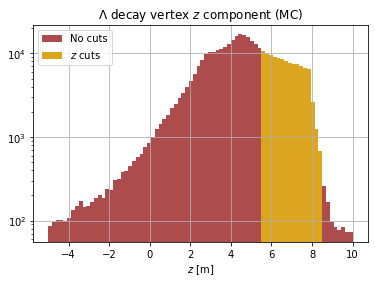

In [10]:
plt.hist(LHCbMC_Lb['L_ENDVERTEX_Z']/1000, bins=80, range=(-5,10),
         color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(LHCbMC_Lb_Filtered['L_ENDVERTEX_Z']/1000, bins=80, range=(-5,10),
         color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $z$ component (MC)")
plt.legend()
plt.xlabel("$z$ [m]")
#plt.savefig("mcvd/lambda_endvertex/LEVz_MC.pdf")
plt.show()

# $\Lambda$ invariant mass
## DTF_FixJPsi

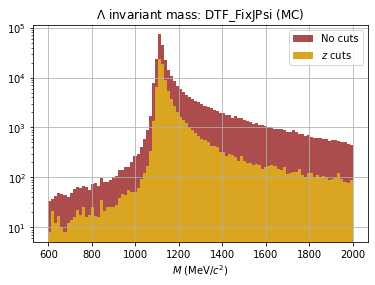

In [11]:
plt.hist(LHCbMC_Lb['DTF_FixJPsi_L_M'],bins=100,
         range=(600,2000), color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(LHCbMC_Lb_Filtered['DTF_FixJPsi_L_M'],bins=100,
         range=(600,2000), color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title("$\Lambda$ invariant mass: DTF_FixJPsi (MC)")
plt.legend()
#plt.savefig("mcvd/lambda_invariant-mass/LIM_DTF-FixJPsi_MC.pdf")
plt.show()

## DTF_FixJPsiLambda

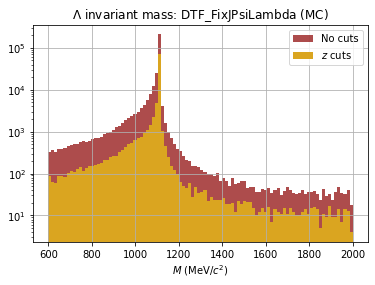

In [12]:
plt.hist(LHCbMC_Lb['DTF_FixJPsiLambda_L_M'],bins=100,
         range=(600,2000), color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_L_M'],bins=100,
         range=(600,2000), color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title("$\Lambda$ invariant mass: DTF_FixJPsiLambda (MC)")
plt.legend()
#plt.savefig("mcvd/lambda_invariant-mass/LIM_DTF-FixJPsiLambda_MC.pdf")
plt.show()

# $\Lambda$ vertex fit $\chi^2$

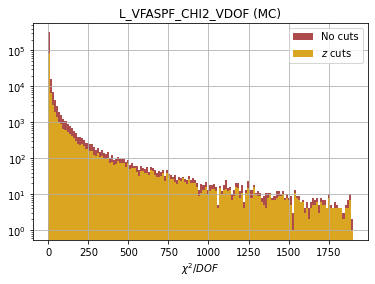

In [13]:
plt.hist(LHCbMC_Lb['L_VFASPF_CHI2_VDOF'], bins=150,
         range=(0,1900), color='darkred', label="No cuts", alpha=0.7)
plt.hist(LHCbMC_Lb_Filtered['L_VFASPF_CHI2_VDOF'], bins=150,
         range=(0,1900), color='goldenrod', label="$z$ cuts", alpha=1)
plt.yscale('log')
plt.grid()
plt.title("L_VFASPF_CHI2_VDOF (MC)")
plt.legend()
plt.xlabel("$\chi^2 / DOF$")
#plt.savefig("mcvd/lambda_vertex-fit/LVF_VFASPF_CHI2_VDOF_MC.pdf")
plt.show()

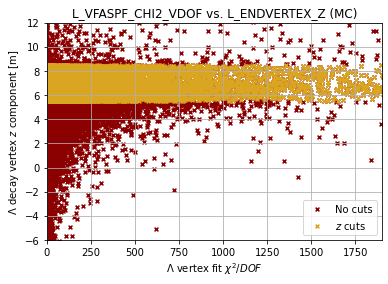

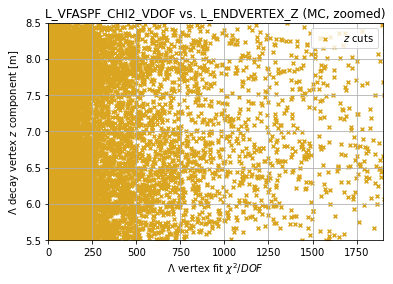

In [14]:
plt.scatter(LHCbMC_Lb['L_VFASPF_CHI2_VDOF'], LHCbMC_Lb['L_ENDVERTEX_Z']/1000,
           s=15, marker='x', label="No cuts", color='darkred')
plt.scatter(LHCbMC_Lb_Filtered['L_VFASPF_CHI2_VDOF'], LHCbMC_Lb_Filtered['L_ENDVERTEX_Z']/1000,
           s=15, marker='x', label="$z$ cuts", color='goldenrod')
plt.grid()
plt.legend()
plt.xlabel("$\Lambda$ vertex fit $\chi^2 / DOF$")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title("L_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC)")
plt.xlim((0,1900))
plt.ylim((-6,12))
#plt.savefig("mcvd/lambda_vertex-fit/LVF_VFASPF_CHI2_VDOF-vs-ENDVERTEX_Z_MC.pdf")
plt.show()

plt.scatter(LHCbMC_Lb_Filtered['L_VFASPF_CHI2_VDOF'], LHCbMC_Lb_Filtered['L_ENDVERTEX_Z']/1000,
           s=15, marker='x', label="$z$ cuts", color='goldenrod')
plt.grid()
plt.legend()
plt.xlabel("$\Lambda$ vertex fit $\chi^2 / DOF$")
plt.title("L_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC, zoomed)")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.xlim((0,1900))
plt.ylim((5.5,8.5))
#plt.savefig("mcvd/lambda_vertex-fit/LVF_VFASPF_CHI2_VDOF-vs-ENDVERTEX_Z_zoom_MC.pdf")
plt.show()

# $\Lambda_b$ vertex fit $\chi^2$

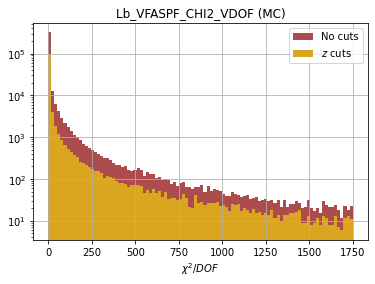

In [15]:
plt.hist(LHCbMC_Lb['Lb_VFASPF_CHI2_VDOF'], bins=100,
         range=(0,1750), color='darkred', label="No cuts", alpha=0.7)
plt.hist(LHCbMC_Lb_Filtered['Lb_VFASPF_CHI2_VDOF'], bins=100,
         range=(0,1750), color='goldenrod', label="$z$ cuts", alpha=1)
plt.yscale('log')
plt.grid()
plt.title("Lb_VFASPF_CHI2_VDOF (MC)")
plt.legend()
plt.xlabel("$\chi^2 / DOF$")
#plt.savefig("mcvd/lambdab_vertex-fit/LbVF_VFASPF_CHI2_VDOF_MC.pdf")
plt.show()

/afs/cern.ch/user/a/adegenna/venus/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


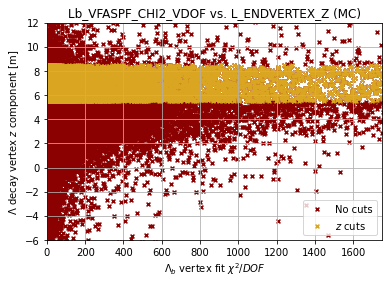

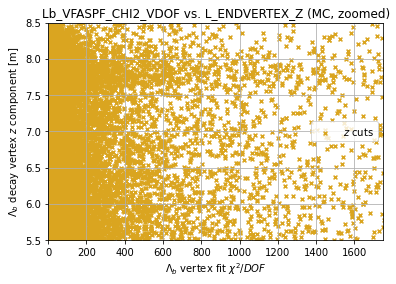

In [16]:
plt.scatter(LHCbMC_Lb['Lb_VFASPF_CHI2_VDOF'],
            LHCbMC_Lb['L_ENDVERTEX_Z']/1000,
           s=15, marker='x', label="No cuts", color='darkred')
plt.scatter(LHCbMC_Lb_Filtered['Lb_VFASPF_CHI2_VDOF'],
            LHCbMC_Lb_Filtered['L_ENDVERTEX_Z']/1000,
           s=15, marker='x', label="$z$ cuts", color='goldenrod')
plt.grid()
plt.legend()
plt.xlabel("$\Lambda_b$ vertex fit $\chi^2 / DOF$")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title("Lb_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC)")
plt.xlim((0,1750))
plt.ylim((-6,12))
#plt.savefig("mcvd/lambdab_vertex-fit/LbVF_VFASPF_CHI2_VDOF-vs-ENDVERTEX_Z_MC.pdf")
plt.show()

plt.scatter(LHCbMC_Lb_Filtered['Lb_VFASPF_CHI2_VDOF'],
            LHCbMC_Lb_Filtered['L_ENDVERTEX_Z']/1000,
           s=15, marker='x', label="$z$ cuts", color='goldenrod')
plt.grid()
plt.legend()
plt.xlabel("$\Lambda_b$ vertex fit $\chi^2 / DOF$")
plt.title("Lb_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC, zoomed)")
plt.ylabel("$\Lambda_b$ decay vertex $z$ component [m]")
plt.xlim((0,1750))
plt.ylim((5.5,8.5))
#plt.savefig("mcvd/lambdab_vertex-fit/LbVF_VFASPF_CHI2_VDOF-vs-ENDVERTEX_Z_zoom_MC.pdf")
plt.show()

# Proton momentum
## $x$ component

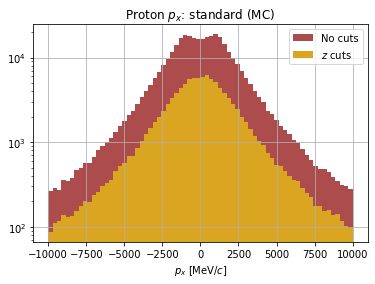

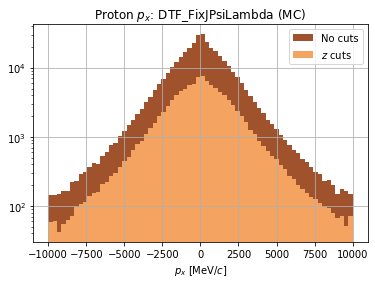

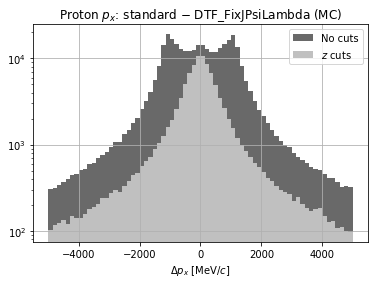

In [17]:
plt.hist(LHCbMC_Lb['p_PX'], bins=70, range=(-1e4,1e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(LHCbMC_Lb_Filtered['p_PX'], bins=70, range=(-1e4,1e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

plt.hist(LHCbMC_Lb['DTF_FixJPsiLambda_p_PX'], range=(-1e4,1e4),
         bins=70, color='sienna', alpha=1, label="No cuts")
plt.hist(LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PX'], range=(-1e4,1e4),
         bins=70, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_DTF_MC.pdf")
plt.show()

plt.hist(LHCbMC_Lb['p_PX'] - LHCbMC_Lb['DTF_FixJPsiLambda_p_PX'],
         range=(-5000,5000), bins=70, color='dimgray', alpha=1, label='No cuts')
plt.hist(LHCbMC_Lb_Filtered['p_PX'] - LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PX'],
         range=(-5000,5000), bins=70, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_STANDARD-minus-DTF_MC.pdf")
plt.show()

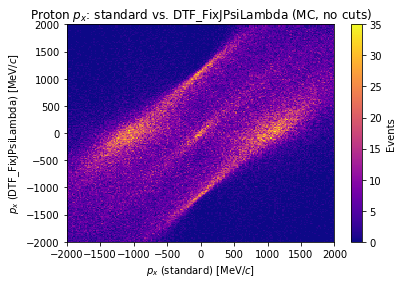

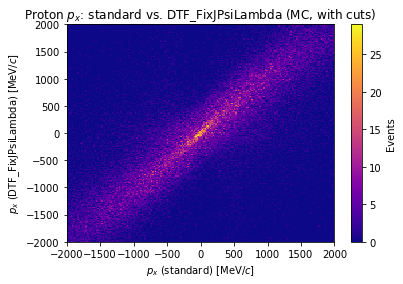

In [39]:
plt.hist2d(LHCbMC_Lb['p_PX'], LHCbMC_Lb['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='plasma',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x$ (standard) [MeV/$c$]")
plt.ylabel("$p_x$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_x$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(LHCbMC_Lb_Filtered['p_PX'], LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='plasma',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x$ (standard) [MeV/$c$]")
plt.ylabel("$p_x$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_x$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()

## $y$ component

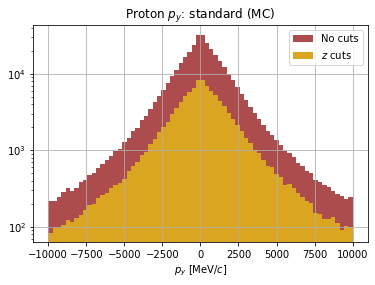

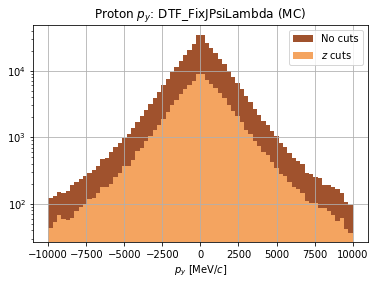

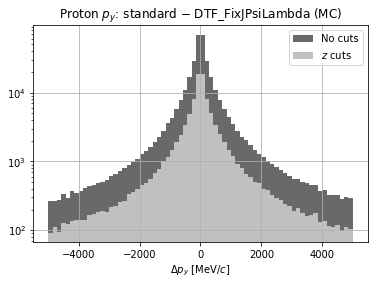

In [19]:
plt.hist(LHCbMC_Lb['p_PY'], bins=70, range=(-1e4,1e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(LHCbMC_Lb_Filtered['p_PY'], bins=70, range=(-1e4,1e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

plt.hist(LHCbMC_Lb['DTF_FixJPsiLambda_p_PY'], range=(-1e4,1e4),
         bins=70, color='sienna', alpha=1, label="No cuts")
plt.hist(LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PY'], range=(-1e4,1e4),
         bins=70, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_DTF_MC.pdf")
plt.show()

plt.hist(LHCbMC_Lb['p_PY'] - LHCbMC_Lb['DTF_FixJPsiLambda_p_PY'],
         range=(-5000,5000), bins=70, color='dimgray', alpha=1, label='No cuts')
plt.hist(LHCbMC_Lb_Filtered['p_PY'] - LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PY'],
         range=(-5000,5000), bins=70, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p_y$ [MeV/$c$]")
plt.title("Proton $p_y$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_STANDARD-minus-DTF_MC.pdf")
plt.show()

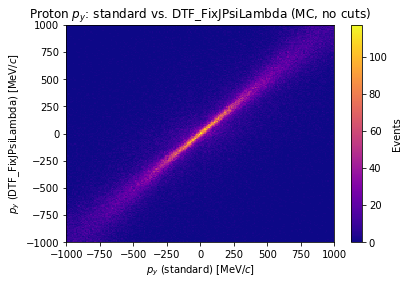

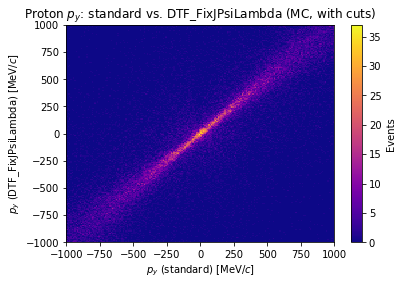

In [43]:
plt.hist2d(LHCbMC_Lb['p_PY'], LHCbMC_Lb['DTF_FixJPsiLambda_p_PY'], bins=200, cmap='plasma',
          range=[[-1e3,1e3],[-1e3,1e3]])
plt.xlabel("$p_y$ (standard) [MeV/$c$]")
plt.ylabel("$p_y$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_y$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(LHCbMC_Lb_Filtered['p_PY'], LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PY'], bins=200, cmap='plasma',
          range=[[-1e3,1e3],[-1e3,1e3]])
plt.xlabel("$p_y$ (standard) [MeV/$c$]")
plt.ylabel("$p_y$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_y$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()

## $z$ component

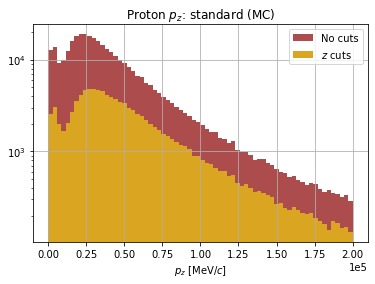

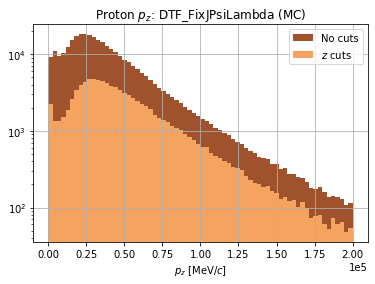

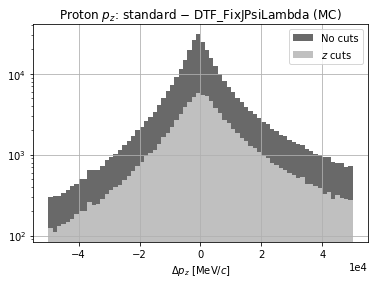

In [21]:
plt.hist(LHCbMC_Lb['p_PZ'], bins=70, range=(0,2e5),
         color='darkred', alpha=0.7, label="No cuts")
plt.hist(LHCbMC_Lb_Filtered['p_PZ'], bins=70, range=(0,2e5),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$: standard (MC)")
plt.legend()
plt.yscale('log')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.savefig("mcvd/proton_momentum/pz_STANDARD_MC.pdf")
plt.show()

plt.hist(LHCbMC_Lb['DTF_FixJPsiLambda_p_PZ'],
         range=(0,2e5), bins=70, color='sienna', alpha=1, label="No cuts")
plt.hist(LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PZ'],
         range=(0,2e5), bins=70, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/pz_DTF_MC.pdf")
plt.show()

plt.hist(LHCbMC_Lb['p_PZ'] - LHCbMC_Lb['DTF_FixJPsiLambda_p_PZ'],
         range=(-5e4,5e4), bins=70, color='dimgray', alpha=1, label='No cuts')
plt.hist(LHCbMC_Lb_Filtered['p_PZ']
         - LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PZ'],
         range=(-5e4,5e4), bins=70, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p_z$ [MeV/$c$]")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title("Proton $p_z$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/pz_STANDARD-minus-DTF_MC.pdf")
plt.show()

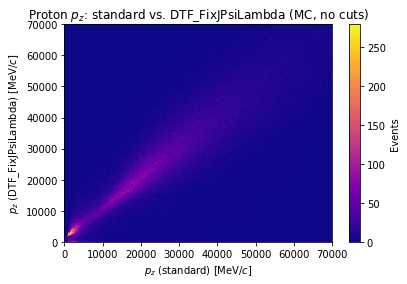

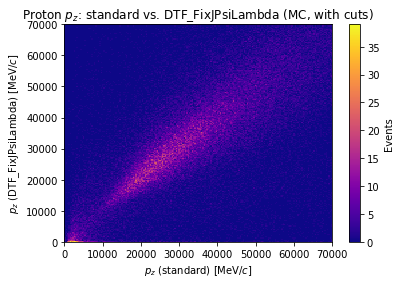

In [45]:
plt.hist2d(LHCbMC_Lb['p_PZ'], LHCbMC_Lb['DTF_FixJPsiLambda_p_PZ'], bins=200, cmap='plasma',
          range=[[0,7e4],[0,7e4]])
plt.xlabel("$p_z$ (standard) [MeV/$c$]")
plt.ylabel("$p_z$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_z$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(LHCbMC_Lb_Filtered['p_PZ'], LHCbMC_Lb_Filtered['DTF_FixJPsiLambda_p_PZ'], bins=200, cmap='plasma',
          range=[[0,7e4],[0,7e4]])
plt.xlabel("$p_z$ (standard) [MeV/$c$]")
plt.ylabel("$p_z$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_z$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()